In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Import Data

In [3]:
voice = pd.read_csv('curr_udpjitter.csv')
voice.head()

,unit_id,dtime,target,packet_size,stream_rate,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,successes,failures,location_id
0,16,2018-01-01 00:30:35,samk01.plal.ca.frontiernet.net,160,64000,14998321,500,500,500,500,1418,957,22280,1,0,2606734
1,16,2018-01-01 00:30:53,ispmon.samknows.mlab1v4.lax02.measurement-lab.org,160,64000,14995458,500,500,500,500,1552,985,14671,1,0,2606734
2,16,2018-01-01 00:31:11,samknows1.lax1.level3.net,160,64000,15001104,500,500,500,500,1560,855,14003,1,0,2606734
3,16,2018-01-01 02:29:46,samk01.plal.ca.frontiernet.net,160,64000,15001224,500,500,500,500,1426,987,22294,1,0,2606734
4,16,2018-01-01 02:30:04,ispmon.samknows.mlab1v4.lax02.measurement-lab.org,160,64000,14995314,500,500,500,500,1464,932,14648,1,0,2606734


In [5]:
video = pd.read_csv('curr_videostream.csv')
video.head()

,unit_id,dtime,target,downthrpt,downjitter,latency,jitter,buffer_underruns,buffer_delay,buffer_filltime,duration,bitrate,buffer_size,successes,failures,location_id


In [6]:
webget = pd.read_csv('curr_webget.csv')
webget.head()

,unit_id,dtime,target,address,fetch_time,bytes_total,bytes_sec,objects,threads,requests,...,ttfb_min,ttfb_avg,ttfb_max,lookup_total_time,lookup_min_time,lookup_avg_time,lookup_max_time,successes,failures,location_id
0,16,2018-01-01 03:35:19,http://www.apple.com/,23.222.217.101,23716601,2056901,86728,15,8,15,...,891773,5656260,8206666,23236,11458,11618,11778,1,0,2606734
1,16,2018-01-01 03:35:28,http://www.bbc.com/,151.101.196.81,6109209,632676,103561,34,8,33,...,38767,1645866,4378226,330561,10844,33056,106693,1,0,2606734
2,16,2018-01-01 03:36:01,http://edition.cnn.com/,151.101.129.67,31301033,3530800,112801,23,8,17,...,48061,2890258,11218203,93256,10088,11657,12928,0,1,2606734
3,16,2018-01-01 03:36:08,http://www.msn.com/,204.79.197.203,4600434,475174,103288,8,8,8,...,84530,753222,1360965,73190,11049,24396,50416,1,0,2606734
4,16,2018-01-01 03:36:24,http://www.ebay.com/,23.57.39.122,13475773,923603,68538,67,8,15,...,709954,3890764,10461842,69475,10309,11579,13640,0,1,2606734


## Aggeregate

In [20]:
throughout_mean = np.zeros(shape = (3, ))
throughout_std = np.zeros(shape = (3, ))
availability = np.zeros(shape = (3, ))

throughout_mean[0] = (voice.loc[voice['latency'] != 0, 'packet_size'] * voice.loc[voice['latency'] != 0, 'packets_down_recv'] / \
               voice.loc[voice['latency'] != 0, 'latency']).mean() * 1000000
#throughout_mean[1] = video.loc[video['latency'] != 0, 'downthrpt'].mean()
throughout_mean[2] = webget.loc[webget['bytes_sec'] != 0,'bytes_sec'].mean()

throughout_std[0] = ((voice.loc[voice['latency'] != 0, 'packet_size'] * voice.loc[voice['latency'] != 0, 'packets_down_recv'] / \
               voice.loc[voice['latency'] != 0, 'latency']) * 1000000).std()
#throughout_std[1] = video.loc[video['latency'] != 0, 'downthrpt'].std()
throughout_std[2] = webget.loc[webget['bytes_sec'] != 0,'bytes_sec'].std()

availability[0] = np.sum(np.array(voice[['successes']])) / np.sum(np.array(voice[['successes','failures']]))
#availability[1] = np.sum(np.array(video[['successes']])) / np.sum(np.array(video[['successes','failures']]))
availability[2] = np.sum(np.array(webget[['successes']])) / np.sum(np.array(webget[['successes','failures']]))

media_array = []
list1 = ['2018-01', 'Voice', throughout_mean[0], throughout_std[0], availability[0]]
media_array.append(list1)
list2 = ['2018-01', 'Video', throughout_mean[1], throughout_std[1], availability[1]]
media_array.append(list2)
list3 = ['2018-01', 'Webget', throughout_mean[2], throughout_std[2], availability[2]]
media_array.append(list3)

media_df = pd.DataFrame(media_array, columns = ['Date', 'Media', 'throughout_mean', 'throughout_std', 'Availability'])
media_df

,Date,Media,throughout_mean,throughout_std,Availability
0,2018-01,Voice,4.535363e+06,4.636585e+06,0.989320
1,2018-01,Video,0.000000e+00,0.000000e+00,0.000000
2,2018-01,Webget,9.791181e+05,1.592679e+06,0.955308


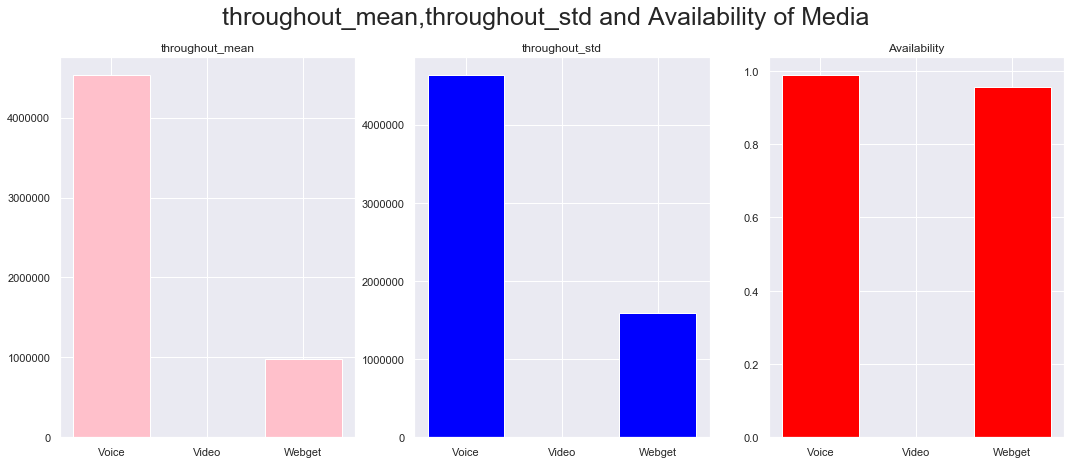

In [24]:
fig, ax = plt.subplots(1, 3 ,sharex = True, figsize = (18,7))
_ = ax[0].bar(np.squeeze(np.array(media_df[['Media']])), \
              np.squeeze(np.array(media_df[['throughout_mean']])), color='pink', edgecolor='white')
_ = ax[0].set_title('throughout_mean')
_ = ax[1].bar(np.squeeze(np.array(media_df[['Media']])), \
              np.squeeze(np.array(media_df[['throughout_std']])), color='blue', edgecolor='white')
_ = ax[1].set_title('throughout_std')
_ = ax[2].bar(np.squeeze(np.array(media_df[['Media']])), \
              np.squeeze(np.array(media_df[['Availability']])), color='red', edgecolor='white')
_ = ax[2].set_title('Availability')
_ = fig.suptitle('throughout_mean,throughout_std and Availability of Media', fontsize = 25)